<a href="https://colab.research.google.com/github/dandamudi-geeta/Machine-Learning/blob/main/2348512_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/content/employee_data (1) 2.csv')

In [ ]:
data.head()


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [6]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
for col in data.select_dtypes(["int64","float64"]).columns:
  data[col]=data[col].fillna(data[col].mean())
  print(data[col].mean())

199.79577514211525
1.0
0.7184766791763917
3.7738086883290056
1.0
0.6212954351350499
3.497227750924083


In [ ]:
data.isnull().sum()

avg_monthly_hrs        0
department           709
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
dtype: int64

In [8]:
data.sample(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
7461,246,marketing,NaN,0.709610,4,1.0,low,0.865064,Employed,3.0
9574,242,support,NaN,0.908943,5,NaN,medium,0.725403,Left,5.0
2082,164,sales,NaN,0.714642,4,NaN,low,0.524464,Left,2.0
7270,235,sales,NaN,0.493687,4,NaN,medium,0.969637,Employed,4.0
10278,142,marketing,NaN,0.464011,2,NaN,low,0.465992,Left,3.0
10212,230,support,NaN,0.568175,5,NaN,medium,0.871948,Employed,3.0
3677,172,sales,1.0,0.869570,4,NaN,medium,0.817841,Employed,3.0
1599,255,information_technology,NaN,0.606735,3,NaN,low,0.677631,Employed,5.0
3083,197,engineering,NaN,0.576610,4,NaN,high,0.855724,Employed,3.0
5112,187,sales,1.0,0.382027,6,NaN,high,0.243964,Employed,10.0


In [10]:
data['tenure']=pd.to_numeric(data['tenure'])

In [12]:
print(data.head())

   avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0  


Exploratory Data Analysis(EDA)

In [14]:
summary_stats=data.describe()

Visualize the distribution of employee tenure using a hologram

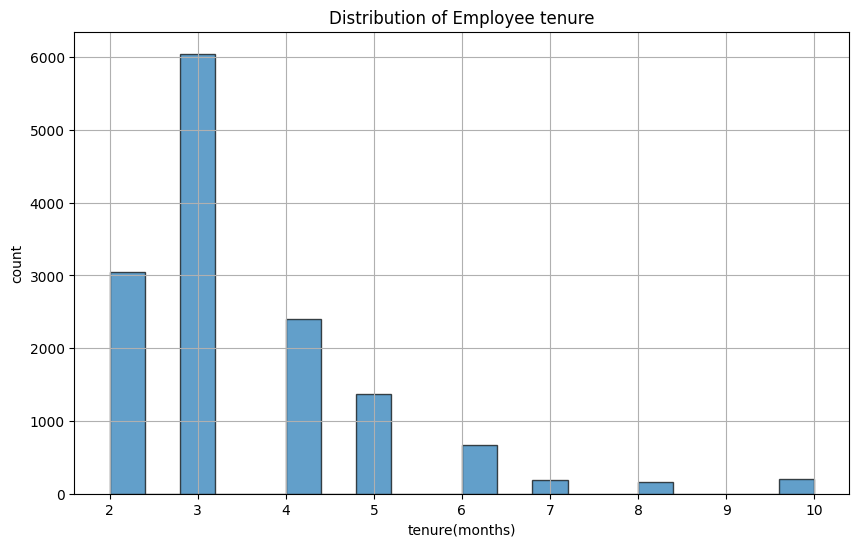

In [17]:
plt.figure(figsize=(10,6))
plt.hist(data['tenure'], bins=20,edgecolor='black',alpha=0.7)
plt.xlabel('tenure(months)')
plt.ylabel('count')
plt.title('Distribution of Employee tenure')
plt.grid(True)
plt.show()



Compare tenure trends between employee who have left and those still employed::

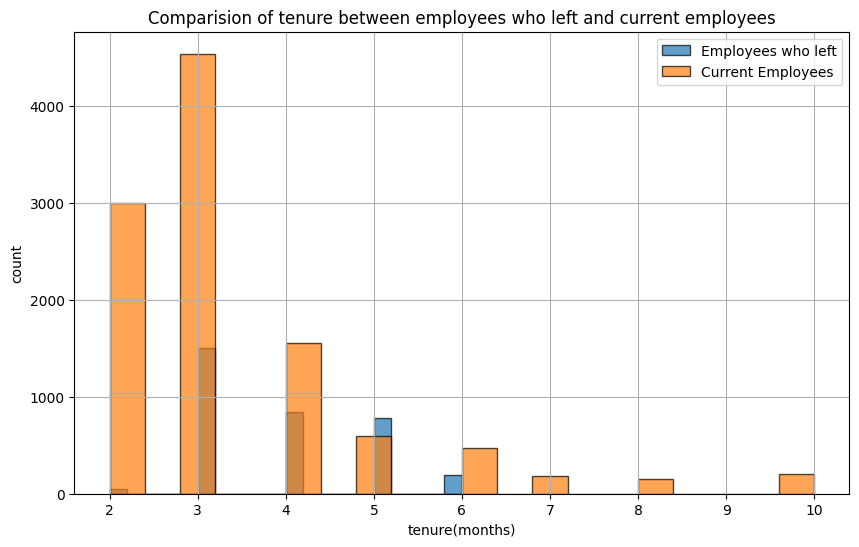

In [18]:
left_employees = data[data['status']=='Left']
current_employees =data[data['status']=='Employed']


plt.figure(figsize=(10,6))
plt.hist(left_employees['tenure'], bins=20,edgecolor='black',alpha=0.7, label='Employees who left')
plt.hist(current_employees['tenure'], bins=20,edgecolor='black',alpha=0.7, label='Current Employees')
plt.xlabel('tenure(months)')
plt.ylabel('count')
plt.title('Comparision of tenure between employees who left and current employees')
plt.legend()
plt.grid(True)
plt.show()

There is negative correlation between employee tenure and the likelihood of leaving the company.Employees with less tenure are more likely to leave the company than employees with more tenure

BOX-PLOT

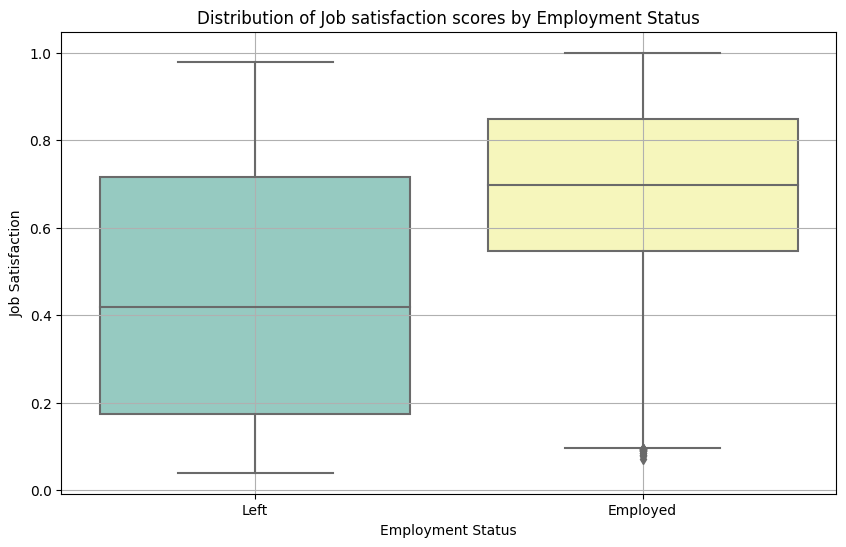

In [23]:
#Create a boxplot to examine the distribution of job satisfaction scores among employees who left the company and those who are still employed.

plt.figure(figsize=(10,6))
sns.boxplot(x='status',y='satisfaction',data=data,palette='Set3')
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction')
plt.title('Distribution of Job satisfaction scores by Employment Status')
plt.grid(True)
plt.show()

The job satisfaction is a factor in employee turnover.Employee with lower job satisfaction score are more more likely to leave the company

**Pie-chart**

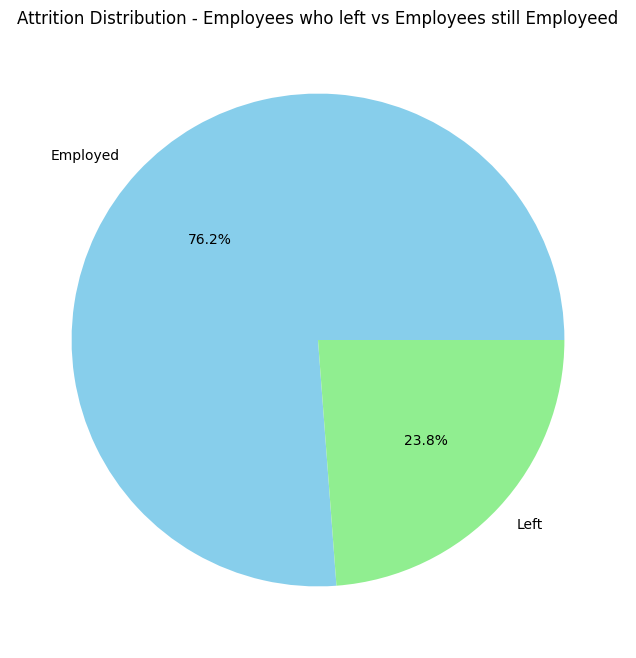

Percentage of employees who have left the company: 23.81% 


In [27]:
#Generate a pie chart to show the distribution of attrition (employees who left vs. employees who are still employed)

attrition_counts= data['status'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(attrition_counts, labels=attrition_counts.index,autopct='%1.1f%%',colors=['skyblue','LightGreen'])
plt.title('Attrition Distribution - Employees who left vs Employees still Employeed')
plt.show()

percentage_left= (attrition_counts['Left'] /  attrition_counts.sum()) *100
print(f'Percentage of employees who have left the company:{percentage_left: .2f}% ')

**ScatterPlot**

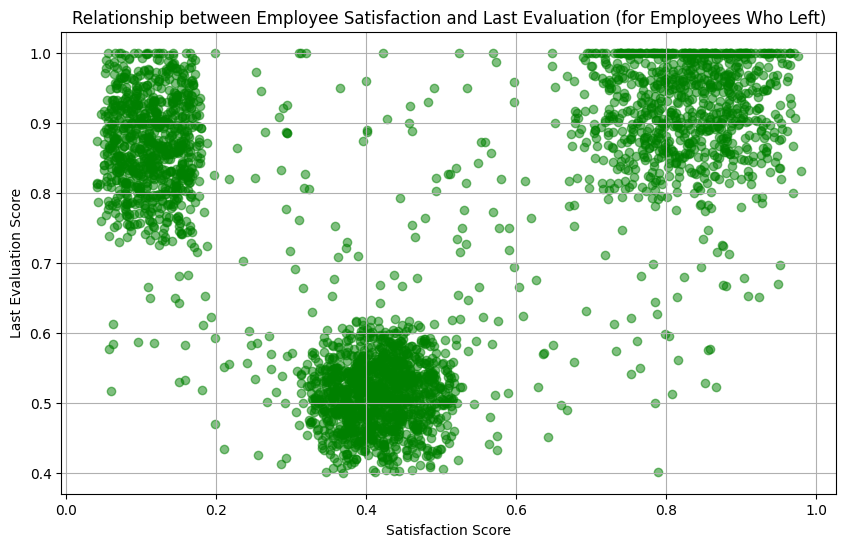

Correlation coefficient between satisfaction and last evaluation for employees who left: 0.18


In [32]:
# Filter data for employees who left
left_employees = data[data['status'] == 'Left']

# Create a scatter plot to explore the relationship between satisfaction and last evaluation
plt.figure(figsize=(10, 6))
plt.scatter(left_employees['satisfaction'], left_employees['last_evaluation'], alpha=0.5, color='green')
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Relationship between Employee Satisfaction and Last Evaluation (for Employees Who Left)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = left_employees['satisfaction'].corr(left_employees['last_evaluation'])
print(f'Correlation coefficient between satisfaction and last evaluation for employees who left: {correlation:.2f}')

**2. Decision Tree Modeling with Tree Pruning and Split Criteria**

Training and split data

In [42]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('status', axis=1)  # Features (all columns except 'status')
y = data['status']  # Target variable ('status')

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print('Training set shape:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('\nTesting set shape:')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)


NameError: ignored

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features
selected_features = ['tenure', 'satisfaction', 'n_projects']
X = data[selected_features]
y = data['status']  # Target variable ('status')


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: ignored